In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from toolz import curry

In [2]:
@curry
def std_error(sigma, n): 
    return sigma / np.sqrt(n)


control_mu = 4.5
control_std = 50
control_n = 4137

control_ci = (control_mu + 1.96 * std_error(control_std, control_n),
              control_mu - 1.96 * std_error(control_std, control_n))

control_ci

(6.023643331522193, 2.9763566684778073)

In [3]:
test_mu = 5.0 # ??
test_std = 50
# test_n = ???


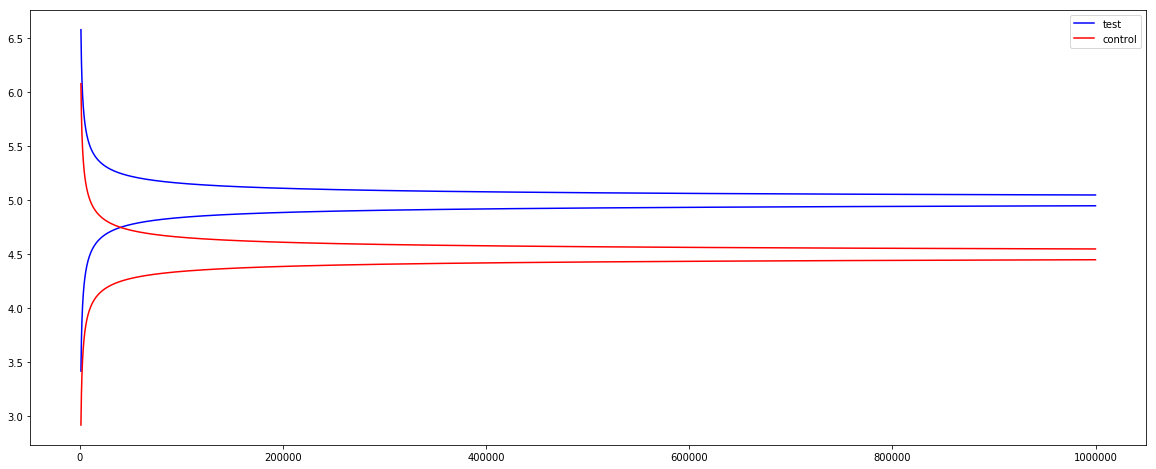

In [4]:
sizes = np.arange(1000, 1000000, 100)
test_mus = np.ones(sizes.shape) * test_mu
test_stds = np.ones(sizes.shape) * test_std

control_mus = np.ones(sizes.shape) * control_mu
control_stds = np.ones(sizes.shape) * control_std


plt.figure(figsize=(20,8))

# test
plt.plot(sizes, test_mus + std_error(test_std, sizes), c="b", label="test") 
plt.plot(sizes, test_mus - std_error(test_std, sizes), c="b") 

# control
plt.plot(sizes, control_mus + std_error(control_stds, sizes), c="r", label="control")
plt.plot(sizes, control_mus - std_error(control_stds, sizes), c="r") 

plt.legend()
plt.show()

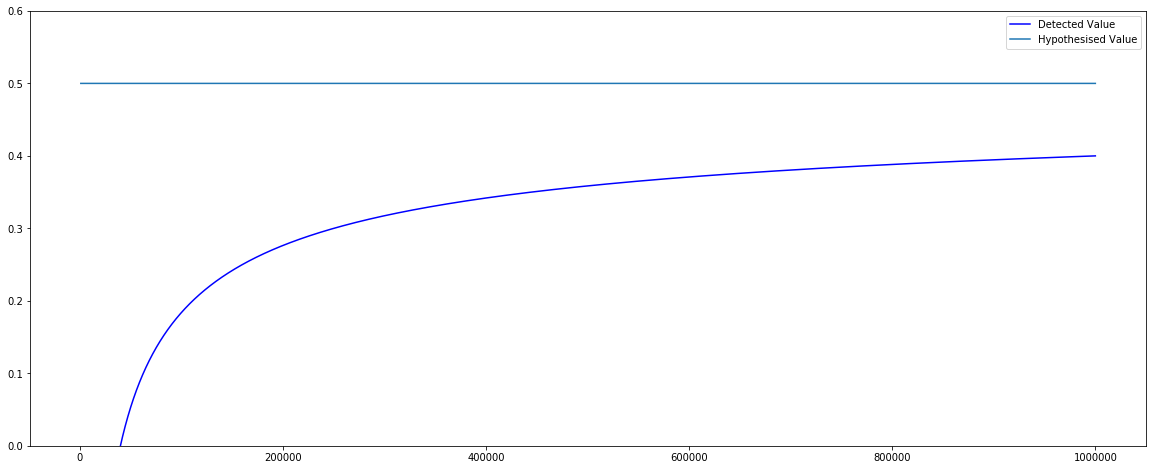

In [5]:
true_factor = np.ones(sizes.shape) * (test_mu - control_mu)

plt.figure(figsize=(20,8))

plt.plot(sizes,
         (test_mus - std_error(test_std, sizes)) - (control_mus + std_error(control_stds, sizes)),
         c="b", label="Detected Value") 


plt.plot(sizes, true_factor, label = "Hypothesised Value")

plt.legend()
plt.ylim((0, 0.6))
plt.show()